In [218]:
import pandas as pd
from itertools import combinations
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



In [208]:
df = pd.read_csv("../Web-Scraping-Stats/cleaned_stats_data/player_stats_combined.csv", index_col=False)
df.rename(columns={'X3P':'ThreeP', 'X3PA': 'ThreeP_Attempted', 'X3P.': 'ThreeP_Percentage', 'FG.': 'FG_Percentage', 'FT.': 'FT_Percentage'}, inplace=True)
print(df.shape)
df.head()

(715, 24)


,Players,Tm,MP,FG,FGA,ThreeP,ThreeP_Attempted,FT,FTA,ORB,...,BLK,TOV,PF,PTS,FG_Percentage,ThreeP_Percentage,FT_Percentage,Player_Type,Region,Year
0,George Gervin,SAS,40:00:00,14,26,0,0,6,9,4,...,0,3,2,34,0.538,NaN,0.667,Starter,East,1980
1,Eddie Johnson,ATL,32:00:00,11,16,0,0,0,0,1,...,0,2,2,22,0.688,NaN,NaN,Starter,East,1980
2,Moses Malone,HOU,31:00:00,7,12,0,0,6,12,6,...,2,5,4,20,0.583,NaN,0.500,Starter,East,1980
3,Julius Erving,PHI,20:00,4,12,0,0,3,4,2,...,1,2,5,11,0.333,NaN,0.750,Starter,East,1980
4,John Drew,ATL,15:00,0,4,0,0,4,5,1,...,0,3,5,4,0.000,NaN,0.800,Starter,East,1980


In [210]:
# predicting region (East or West)
features = df[['TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PF', 'Year']]
features = features.dropna()
target = df['Region']
target = target.loc[features.index]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

k=5
selector = SelectKBest(score_func=f_classif, k=k)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_selected, y_train)

predictions = nb_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy with selected features: {accuracy * 100:.2f}%')

Accuracy with selected features: 50.35%


In [214]:
features.head(10)

,TRB,AST,STL,BLK,TOV,PTS,PF,Year
0,10,3,3,0,3,34,2,1980
1,1,7,6,0,2,22,2,1980
2,12,2,1,2,5,20,4,1980
3,5,2,2,1,2,11,5,1980
4,3,0,2,0,3,4,5,1980
5,5,4,1,4,3,12,5,1980
6,13,0,1,2,3,18,2,1980
7,6,7,1,0,3,7,1,1980
8,3,6,2,0,2,2,1,1980
9,3,1,0,0,2,8,1,1980


In [206]:
# predicting region
best_accuracy = 0
best_feature_combination = None

for r in range(1, len(features.columns) + 1):
    for feature_combination in combinations(features.columns, r):
        X_train_subset = X_train[list(feature_combination)]
        X_test_subset = X_test[list(feature_combination)]

        nb_classifier = GaussianNB()
        nb_classifier.fit(X_train_subset, y_train)

        predictions = nb_classifier.predict(X_test_subset)

        accuracy = accuracy_score(y_test, predictions)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_combination = feature_combination

print(f"Best Feature Combination: {best_feature_combination}")
print(f"Accuracy: {best_accuracy * 100:.2f}%")

Best Feature Combination: ('TRB', 'BLK', 'TOV', 'PTS', 'PF')
Accuracy: 60.14%


In [219]:
report = classification_report(y_test, predictions)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        East       0.52      0.77      0.62        75
        West       0.45      0.21      0.28        68

    accuracy                           0.50       143
   macro avg       0.48      0.49      0.45       143
weighted avg       0.49      0.50      0.46       143



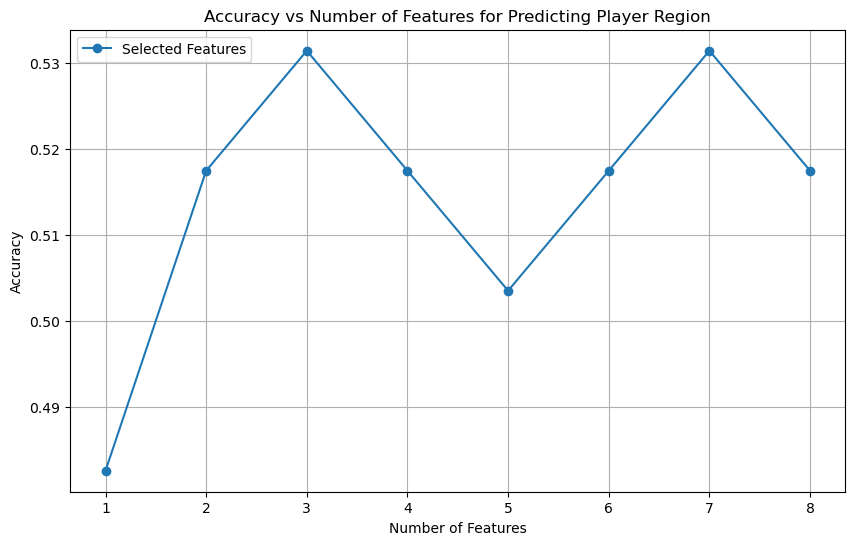

In [207]:
selected_feature_accuracies = []

for k in range(1, len(features.columns) + 1):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    nb_classifier.fit(X_train_selected, y_train)
    selected_feature_accuracy = accuracy_score(y_test, nb_classifier.predict(X_test_selected))
    selected_feature_accuracies.append(selected_feature_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features.columns) + 1), selected_feature_accuracies, marker='o', label='Selected Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features for Predicting Player Region')
plt.legend()
plt.grid(True)
plt.show()

In [222]:
# predicting player_type (starter or reserve)
features = df[['TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PF', 'Year']]
features = features.dropna()
target = df['Player_Type']
target = target.loc[features.index]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

k=5
selector = SelectKBest(score_func=f_classif, k=k)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_selected, y_train)

predictions = nb_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy with selected features: {accuracy * 100:.2f}%')

Accuracy with selected features: 69.93%


In [223]:
# predicting player_type
best_accuracy = 0
best_feature_combination = None

for r in range(1, len(features.columns) + 1):
    for feature_combination in combinations(features.columns, r):
        X_train_subset = X_train[list(feature_combination)]
        X_test_subset = X_test[list(feature_combination)]

        nb_classifier = GaussianNB()
        nb_classifier.fit(X_train_subset, y_train)

        predictions = nb_classifier.predict(X_test_subset)

        accuracy = accuracy_score(y_test, predictions)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_combination = feature_combination

print(f"Best Feature Combination: {best_feature_combination}")
print(f"Accuracy: {best_accuracy * 100:.2f}%")

Best Feature Combination: ('STL', 'TOV')
Accuracy: 73.43%


In [224]:
report = classification_report(y_test, predictions)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Reserve       0.75      0.82      0.78        88
     Starter       0.66      0.56      0.61        55

    accuracy                           0.72       143
   macro avg       0.70      0.69      0.70       143
weighted avg       0.72      0.72      0.72       143



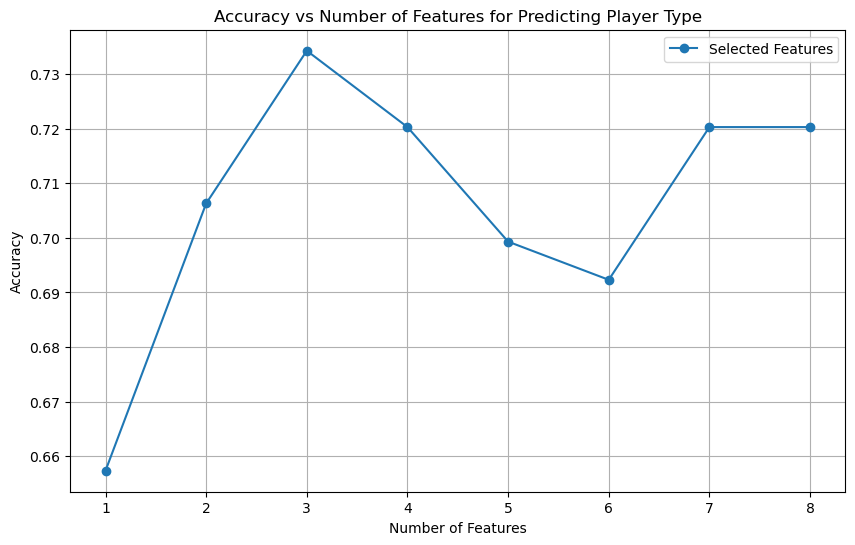

In [204]:
selected_feature_accuracies = []

for k in range(1, len(features.columns) + 1):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    nb_classifier.fit(X_train_selected, y_train)
    selected_feature_accuracy = accuracy_score(y_test, nb_classifier.predict(X_test_selected))
    selected_feature_accuracies.append(selected_feature_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features.columns) + 1), selected_feature_accuracies, marker='o', label='Selected Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features for Predicting Player Type')
plt.legend()
plt.grid(True)
plt.show()